<a href="https://colab.research.google.com/github/Kanka-max/JanuaryClass/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

**Image Classification with the MNIST Dataset**

In [ ]:
from tensorflow.keras.datasets import mnist

**The Problem: Image Classification**

In traditional programming, the programmer is able to articulate rules and conditions in their code that their program can then use to act in the correct way. This approach continues to work exceptionally well for a huge variety of problems.

Image classification, which asks a program to correctly classify an image it has never seen before into its correct class, is near impossible to solve with traditional programming techniques. How could a programmer possibly define the rules and conditions to correctly classify a huge variety of images, especially taking into account images that they have never seen?

**The Solution: Deep Learning**

Deep learning excels at pattern recognition by trial and error. By training a deep neural network with sufficient data, and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.



**The MNIST Dataset**

In the history of deep learning, the accurate image classification of the MNSIT dataset, a collection of 70,000 grayscale images of handwritten digits from 0 to 9, was a major development. While today the problem is considered trivial, doing image classification with MNIST has become a kind of "Hello World" for deep learning.

Loading the Data Into Memory (with Keras)

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
#the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Exploring the MNIST Data**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_valid.shape

(10000,)

This images are 28x28 images represented as a collection of unsingned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where 0 is black 255 is white, and all other values are in between.

**Preparing the Data for Training**

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:

- Flatten the image data, to simplify the image input into the model.
- Normalize the image data, to make the image input values easier to work with for the model
- Categorize the labels, to make the label values easier to work with for the model

In [ ]:
x_train=x_train.reshape(60000,(28*28)) #784=28*28
x_valid=x_valid.reshape(10000,(28*28))

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_valid.shape

(10000, 784)

In [ ]:
x_train[1000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36, 146,
       254, 255, 251,  95,   6,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
x_valid[78]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**Flattening the Image Data**

Though it's possible for a deep learning model to accept a 2-dimensional image (in our case 28x28 pixels), we're going to simplify things to start and reshape each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.

Here we accomplish this using the helper method reshape:

**Normalizing the Image Data**

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [ ]:
x_train=x_train/255
x_valid=x_valid/255

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_valid.dtype

dtype('float64')

In [ ]:
x_valid.max()

1.0

**Categorically Encoding the Labels**

In [ ]:
import tensorflow.keras as keras

num_categories=10

y_train=keras.utils.to_categorical(y_train, num_categories)
y_valid=keras.utils.to_categorical(y_valid, num_categories)



In [ ]:
#x_train=x_train.reshape(60000,(230400) #230400=480*480 
#x_valid=x_valid.reshape(10000,230400)

In [ ]:

#categories=2

#y_train=keras.utils.to_categories(y_train, categories)
#y_valid=kera.utils.to_categories(y_valid, categories)

**Creating the Model**

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several layers and will be comprised of 3 main parts:

An input layer, which will receive data in some expected format
Several hidden layers, each comprised of many neurons. Each neuron will have the ability to affect the network's guess with its weights, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
An output layer, which will depict the network's guess for a given image

**Instantiating the Model**

In [ ]:
from tensorflow.keras.models import Sequential

#initialize the constructor

model=Sequential()

**creating an input layer**

In [25]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation

In [ ]:
model.add(Dense(units= 512, activation="relu", input_shape=(784,)))

**Creating a Hidden layer**

In [ ]:
model.add(Dense(units= 512, activation ="relu"))
model.add(Dense(units= 512, activation ="relu"))
model.add(Dense(units= 512, activation ="relu"))

In [ ]:
# Alternative network
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(784), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(784), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.Activation("relu")

model.add(Dropout(0.5))

model.add(Activation("softmax"))

In [ ]:
#eXtra hidden layer
model.add(Dense(units=512, activation = "relu"))

**Creating an Output layer**

In [ ]:
model.add(Dense(units= 10, activation ="softmax"))

**Summarizing the Model**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


**Compiling the Model**

In [ ]:
# loss_funtion is used for the model to understand how wll it is performing during training
# what would like tot rack while the model trains
# FOR a multi-class - categorical_crossentropy - loss fx
# FOR a binary class - binary_corssentropy

#metric depends on the deep learning use case
# classification problem - accuracy
# regression problem =mean squared erro (mse), root mean squared error (rmse)


# training score vs the validation score = loss function 
# reduce overfitting whereby the training score is significatntly higher thatn the validation score

# gradient descent
# converge the gradient using optimizers
# adam, adagrad, rmsprop, adadelta
# adam and rmsprop


In [ ]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics= "accuracy") #because it has multiple categories

In [ ]:
#underfitting 
# 3 iterations
# training score is loweer than the validation score
# training score is not improving with increase in iteration


#Overfitting
# trainig score is higer than the validation score
# the validation score is not improving with increase in no of iterations

**Training the Model**

When fitting (training) a model with Keras, we use the model's fit method. It expects the following arguments:

- The training data
- The labels for the training data
- The number of times it should train on the entire training dataset (called an epoch)
- The validation or test data, and its labels

In [ ]:
history = model.fit(x_train, y_train, epochs =5, verbose=1, validation_data= (x_valid, y_valid))
history

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1985 - accuracy: 0.9390 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0928 - accuracy: 0.9718 - val_loss: 0.1083 - val_accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0792 - val_accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.1129 - val_accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0440 - accuracy: 0.9873 - val_loss: 0.0775 - val_accuracy: 0.9785


In [22]:
%%time
# stop training when a monitored metric stops improving

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

# fit the model
model.fit(x_train, y_train, 
          epochs =10, verbose=1, 
          validation_data= (x_valid, y_valid), 
          callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0814 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0994 - val_accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0226 - accuracy: 0.9938 - val_loss: 0.1161 - val_accuracy: 0.9771
CPU times: user 1min 36s, sys: 5.96 s, total: 1min 42s
Wall time: 1min 3s


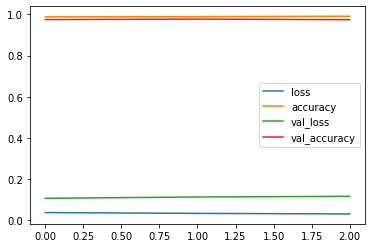

In [21]:
# visualize the training performance versus the validation perfromance
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.plot()